# Cluster a la submuestra de 0 a 12 en edad, de forma multivariada

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv("infantes_usable.csv",parse_dates=["fecha_de_localizacion", "fecha_reporte"])
df.head(2)

,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,clasificacion_causal,causal,year_reporte,dias_de_busqueda_reporte,dias_de_busqueda_evento,year_birthday,edad_calculada,year_evento,dif_edad,tiempo_perdido
0,desaparecido,2012-02-28 03:30:00,2012-02-21 07:30:00,colima,6.0,tecoman,9.0,mexicana,no_especificado,masculino,...,_,_,2012,79 days 08:30:00,86 days 04:30:00,NaN,NaN,2012,NaN,6 days 20:00:00
1,desaparecido,2012-04-05 01:15:00,2012-04-05 01:00:00,colima,6.0,manzanillo,7.0,mexicana,no_especificado,masculino,...,_,_,2012,0 days 10:45:00,0 days 11:00:00,NaN,NaN,2012,NaN,0 days 00:15:00


In [3]:
df["fecha_de_localizacion"].head()

0   2012-05-17 12:00:00
1   2012-04-05 12:00:00
2   2010-03-25 12:00:00
3   2010-08-01 12:00:00
4   2010-12-21 12:00:00
Name: fecha_de_localizacion, dtype: datetime64[ns]

In [4]:
df["fecha_de_localizacion"] = pd.to_datetime(df['fecha_de_localizacion']).dt.date
df.fecha_de_localizacion.head()

0    2012-05-17
1    2012-04-05
2    2010-03-25
3    2010-08-01
4    2010-12-21
Name: fecha_de_localizacion, dtype: object

In [5]:
df["fecha_reporte"] = pd.to_datetime(df['fecha_reporte']).dt.date
df.fecha_reporte.head()

0    2012-02-28
1    2012-04-05
2    2010-03-25
3    2010-08-01
4    2010-12-21
Name: fecha_reporte, dtype: object

In [6]:
infantes = df[["estado", "sexo", "vivo_o_muerto", "estado_localizado", "fecha_reporte", "fecha_de_localizacion", "edad"]]
infantes.head()

,estado,sexo,vivo_o_muerto,estado_localizado,fecha_reporte,fecha_de_localizacion,edad
0,colima,masculino,vivo,no_especificado,2012-02-28,2012-05-17,12.0
1,colima,masculino,vivo,no_especificado,2012-04-05,2012-04-05,2.0
2,nuevo_leon,femenino,vivo,no_especificado,2010-03-25,2010-03-25,1.0
3,nuevo_leon,femenino,vivo,no_especificado,2010-08-01,2010-08-01,12.0
4,nuevo_leon,masculino,vivo,no_especificado,2010-12-21,2010-12-21,4.0


In [7]:
infantes["dias_busqueda"] = (infantes['fecha_de_localizacion'] - infantes['fecha_reporte'])
infantes.dias_busqueda.head()

/tmp/ipykernel_8131/2369386240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infantes["dias_busqueda"] = (infantes['fecha_de_localizacion'] - infantes['fecha_reporte'])


0    79 days, 0:00:00
1             0:00:00
2             0:00:00
3             0:00:00
4             0:00:00
Name: dias_busqueda, dtype: object

In [8]:
infantes.nunique()

estado                     33
sexo                        2
vivo_o_muerto               3
estado_localizado          33
fecha_reporte            2305
fecha_de_localizacion    1929
edad                       12
dias_busqueda            1277
dtype: int64

In [9]:
infantes = infantes.drop(["fecha_de_localizacion", "fecha_reporte"],axis=1)
infantes.head()

,estado,sexo,vivo_o_muerto,estado_localizado,edad,dias_busqueda
0,colima,masculino,vivo,no_especificado,12.0,"79 days, 0:00:00"
1,colima,masculino,vivo,no_especificado,2.0,0:00:00
2,nuevo_leon,femenino,vivo,no_especificado,1.0,0:00:00
3,nuevo_leon,femenino,vivo,no_especificado,12.0,0:00:00
4,nuevo_leon,masculino,vivo,no_especificado,4.0,0:00:00


In [10]:
import gower

distance_matrix = gower.gower_matrix(infantes)
distance_matrix

array([[0.        , 0.3181818 , 0.6666667 , ..., 0.8787879 , 0.969697  ,
        1.        ],
       [0.3181818 , 0.        , 0.34848484, ..., 0.93939394, 0.8484849 ,
        0.8484849 ],
       [0.6666667 , 0.34848484, 0.        , ..., 0.7878788 , 0.6969697 ,
        0.6666667 ],
       ...,
       [0.8787879 , 0.93939394, 0.7878788 , ..., 0.16666667, 0.59090906,
        0.6212121 ],
       [0.969697  , 0.8484849 , 0.6969697 , ..., 0.59090906, 0.16666667,
        0.36363637],
       [1.        , 0.8484849 , 0.6666667 , ..., 0.6212121 , 0.36363637,
        0.16666667]], dtype=float32)

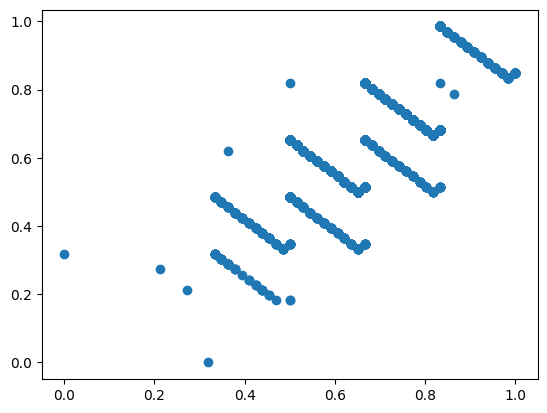

In [11]:
plt.scatter(distance_matrix[:,0], distance_matrix[:,1])

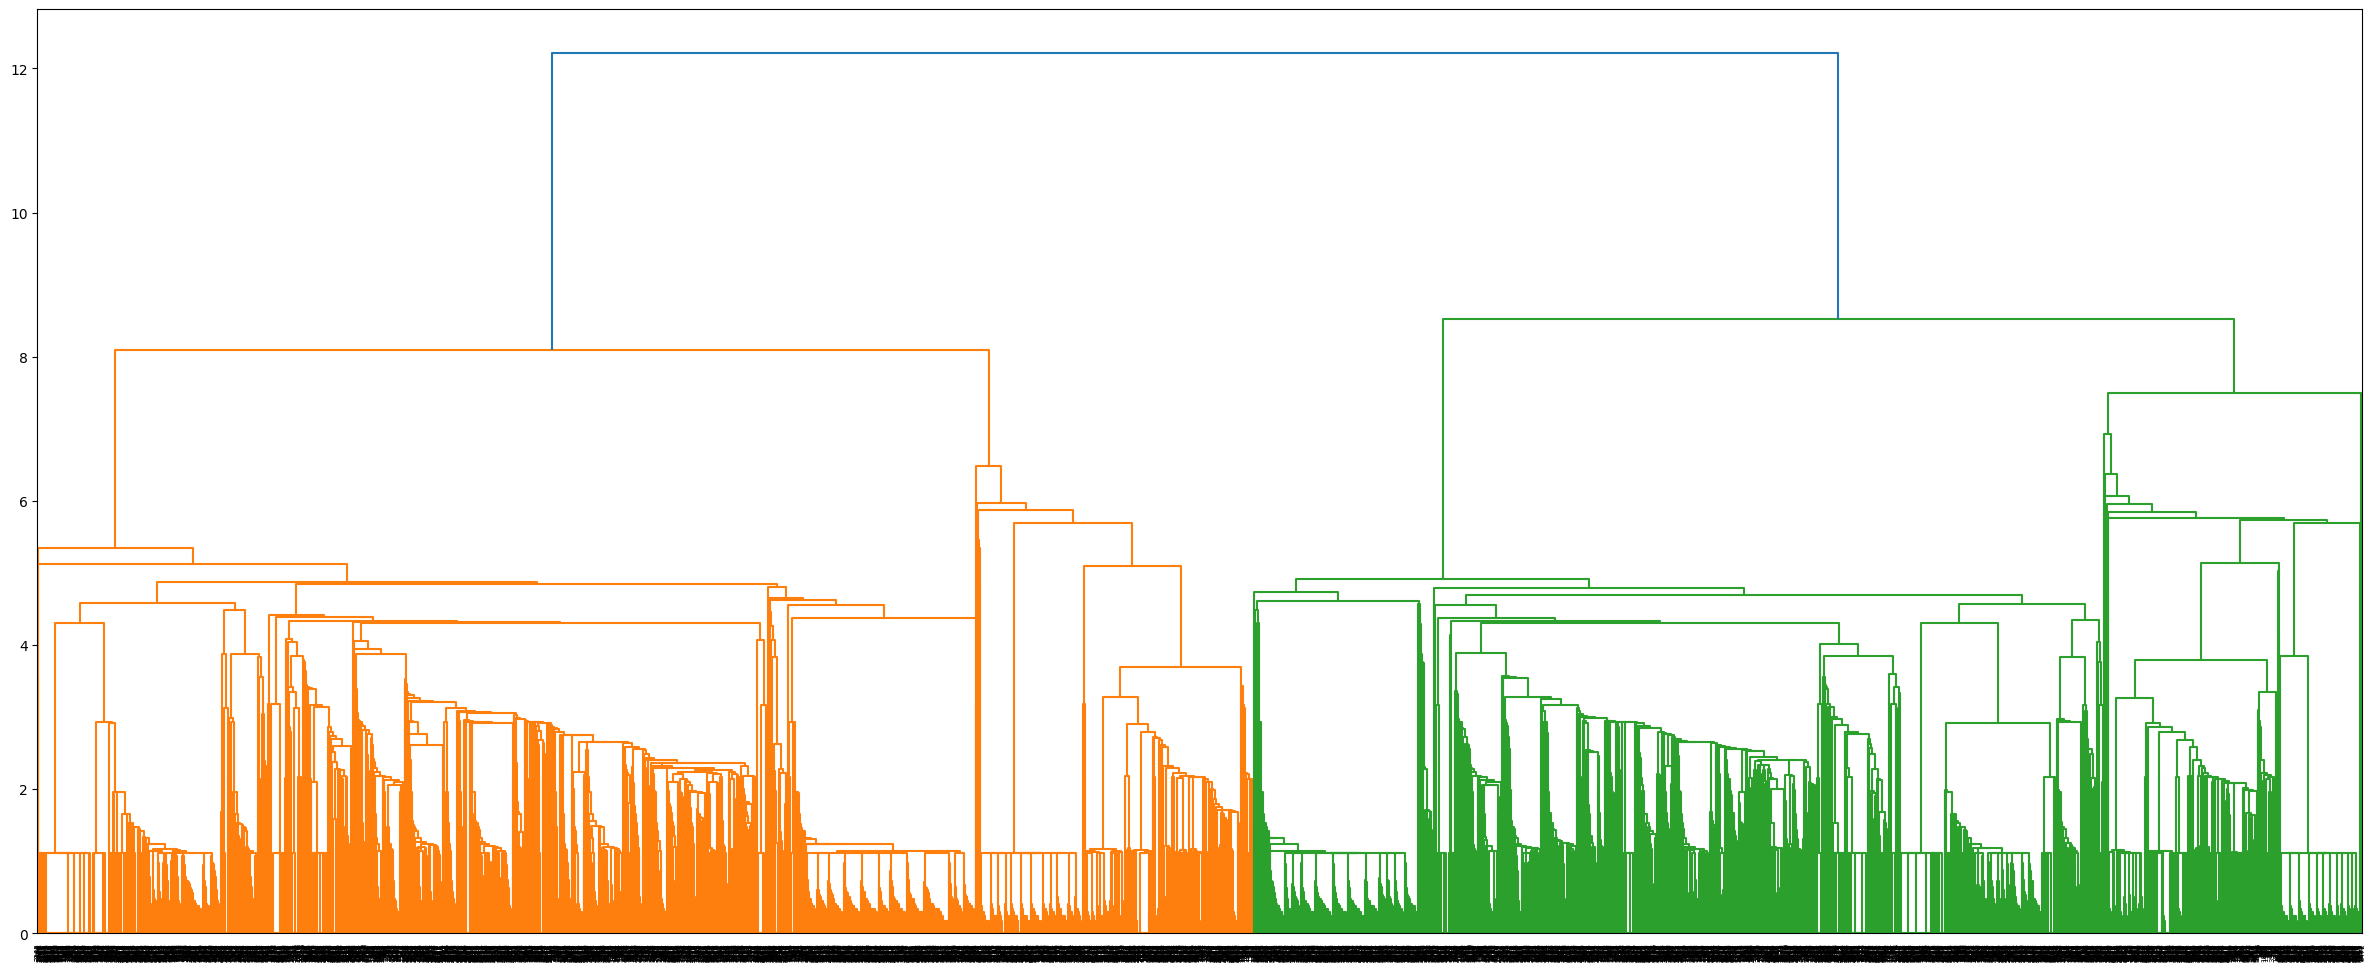

In [12]:
clusters = linkage(distance_matrix, "single")
plt.figure(figsize=(30,12))
dendrogram(clusters)
plt.show()

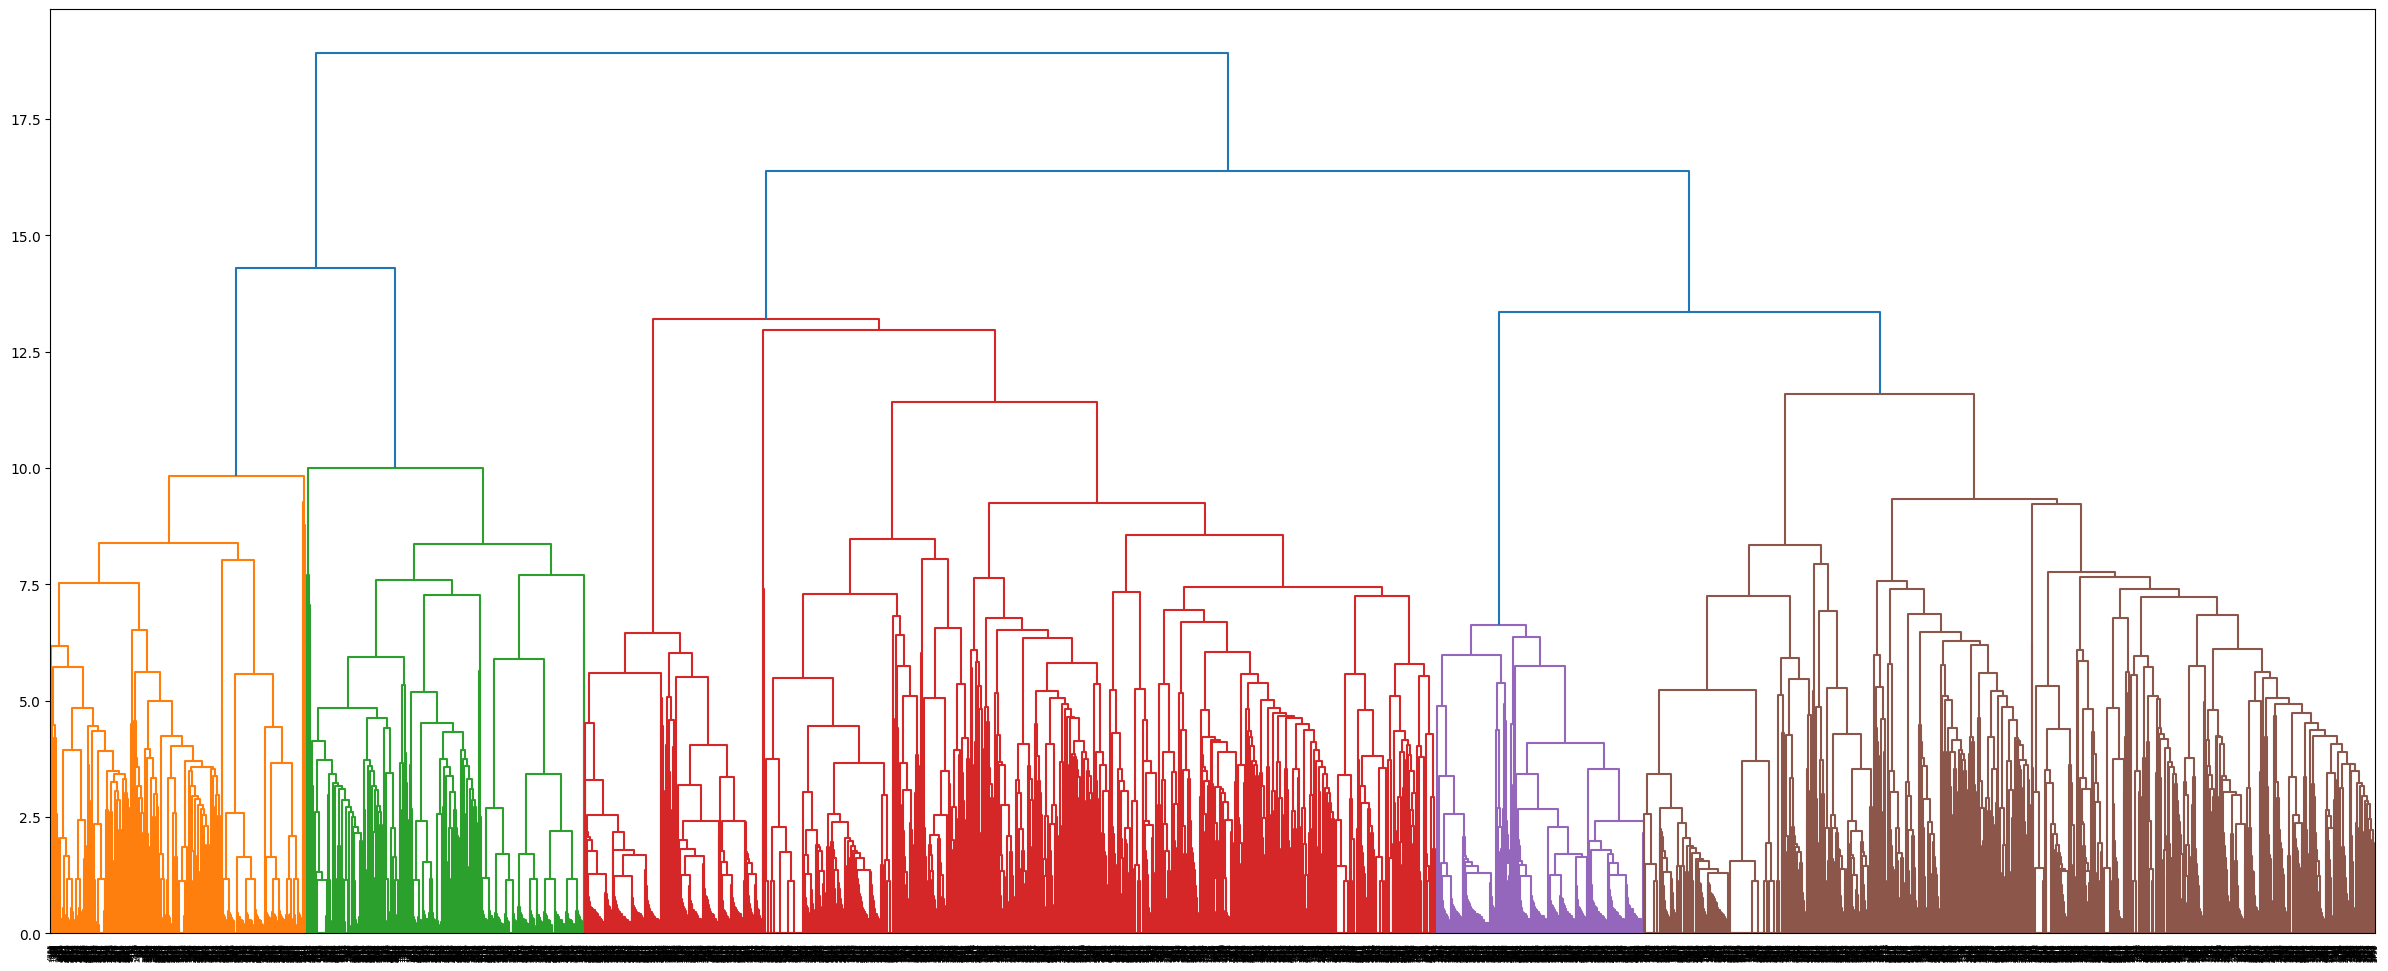

In [13]:
clusters_avg = linkage(distance_matrix, "average")
plt.figure(figsize=(30,12))
dendrogram(clusters_avg)
plt.show()

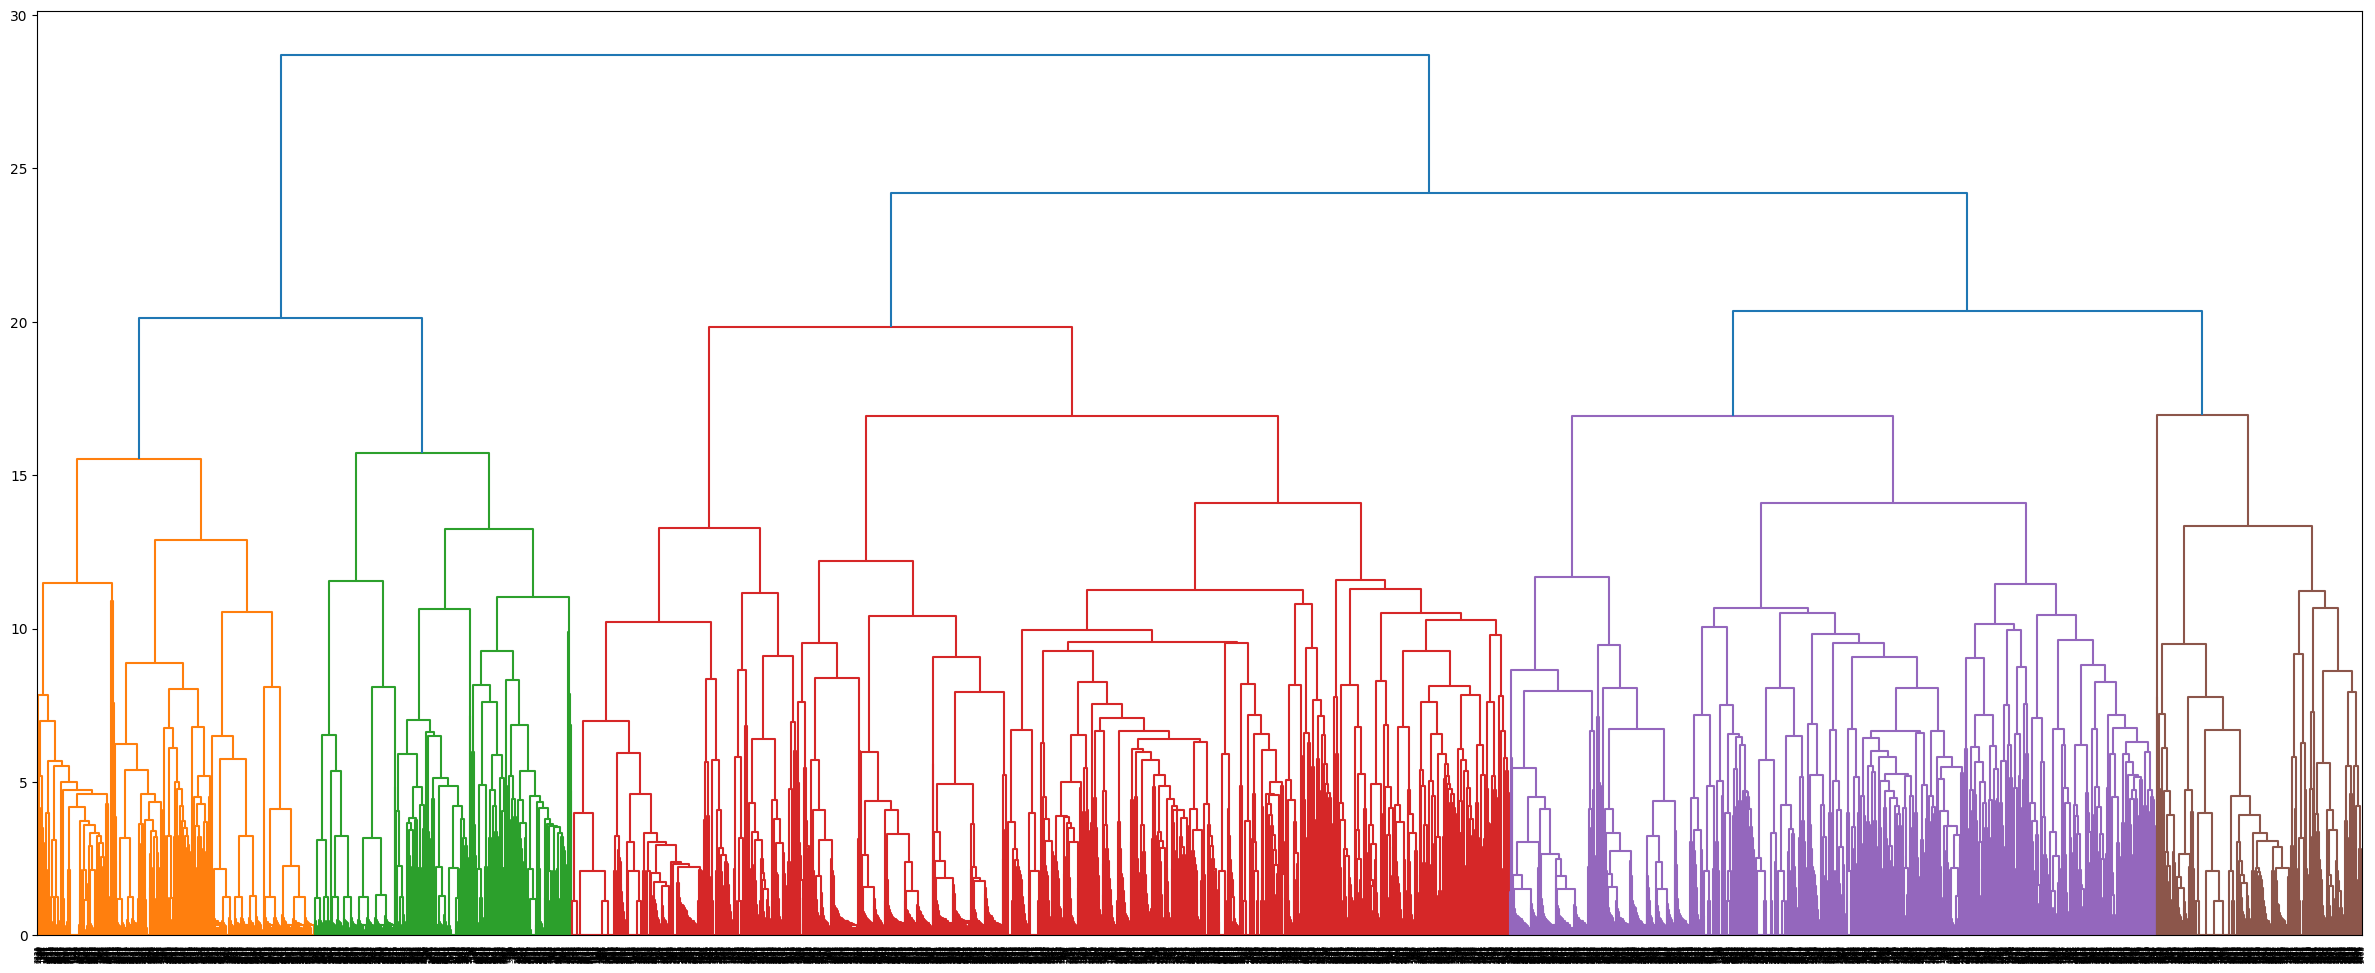

In [14]:
clusters_cmpt = linkage(distance_matrix, "complete")
plt.figure(figsize=(30,12))
dendrogram(clusters_cmpt)
plt.show()

Ahora probemos acortando los dendogramas a 10 clusters....

# Single LInkage

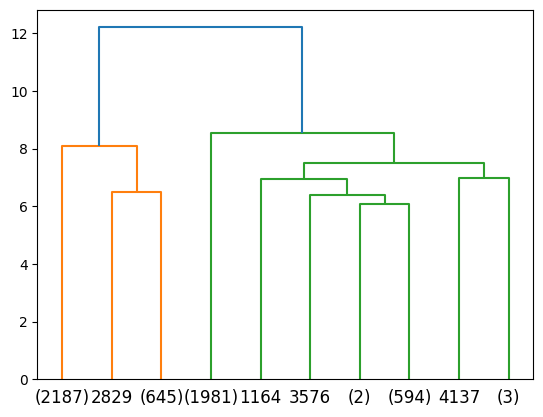

In [15]:
dendrogram(clusters, truncate_mode='lastp', p=10)
plt.show()

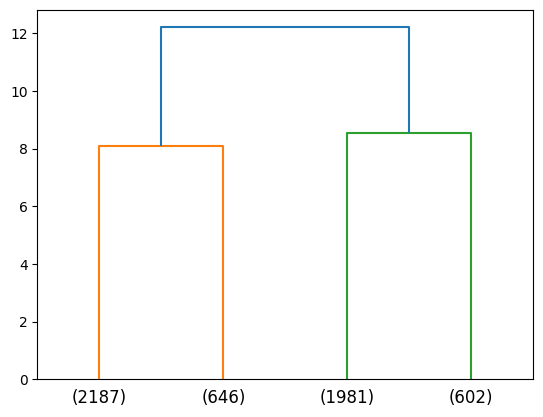

In [16]:
dendrogram(clusters, truncate_mode='lastp', p=4)
plt.show()

# Average Linkage

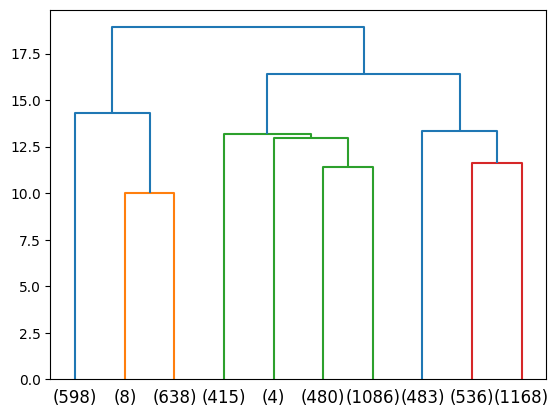

In [17]:
dendrogram(clusters_avg, truncate_mode='lastp', p=10)
plt.show()

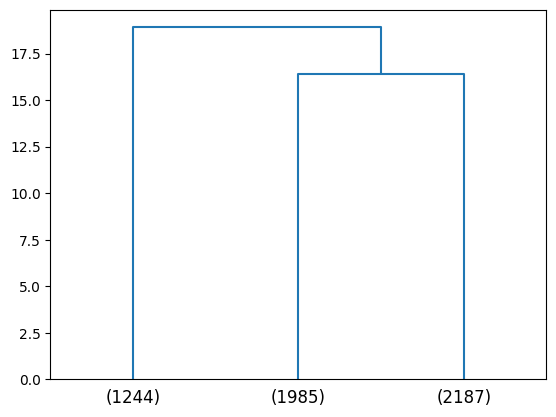

In [18]:
dendrogram(clusters_avg, truncate_mode='lastp', p=3)
plt.show()

# Complete Linkage

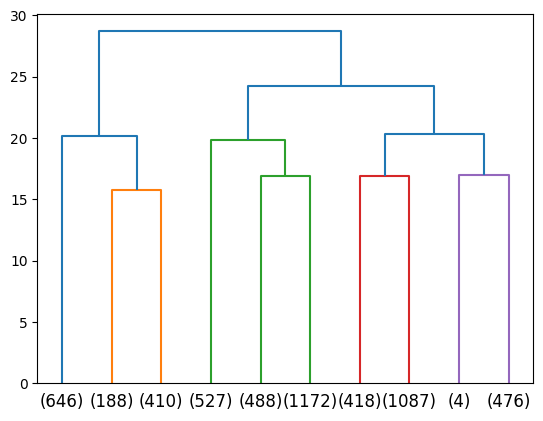

In [19]:
dendrogram(clusters_cmpt, truncate_mode='lastp', p=10)
plt.show()

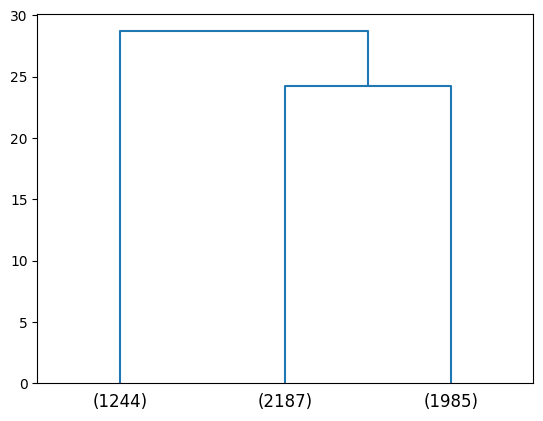

In [20]:
dendrogram(clusters_cmpt, truncate_mode='lastp', p=3)
plt.show()

In [46]:
from scipy.cluster.hierarchy import fcluster

hier_clusters = fcluster(clusters_cmpt, 22, criterion='distance')
len(set(hier_clusters))

3

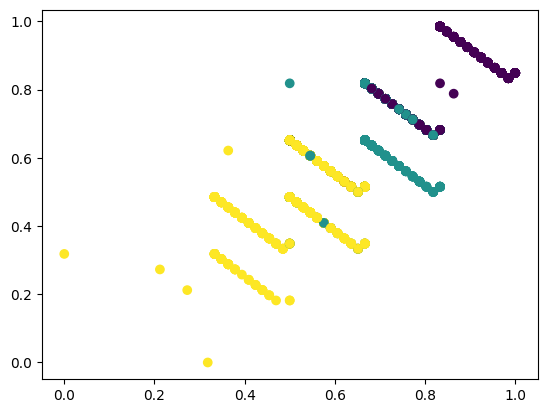

In [47]:
plt.scatter(distance_matrix[:,0], distance_matrix[:,1], c=hier_clusters)

In [23]:
from scipy.cluster.hierarchy import cut_tree 

cluster_labels = cut_tree(clusters_cmpt, n_clusters=3).reshape(-1, )
infantes["cluster"] = cluster_labels

In [24]:
infantes["cluster"].value_counts()

cluster
1    2187
0    1985
2    1244
Name: count, dtype: int64

In [25]:
infantes.head()

,estado,sexo,vivo_o_muerto,estado_localizado,edad,dias_busqueda,cluster
0,colima,masculino,vivo,no_especificado,12.0,"79 days, 0:00:00",0
1,colima,masculino,vivo,no_especificado,2.0,0:00:00,0
2,nuevo_leon,femenino,vivo,no_especificado,1.0,0:00:00,1
3,nuevo_leon,femenino,vivo,no_especificado,12.0,0:00:00,1
4,nuevo_leon,masculino,vivo,no_especificado,4.0,0:00:00,0


In [26]:
infantes.to_csv('infantes_clustered.csv', index=False)